In [139]:
#Ahora empieza lo bueno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, KernelPCA

In [106]:
print("importamos el dataset y verificamos su correcta carga \n")
data = pd.read_csv('DatosTPF.csv')
print(data.shape, data.head())
print("\n revisamos por las dudas que no haya faltantes \n")
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/len(data)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

importamos el dataset y verificamos su correcta carga 

(45209, 15)     Age           Job Marital_Status  Education Credit  Balance HousingL  \
0  58.0       unknown     Divorciado    unknown     no   2143.0      yes   
1  44.0    technician         single  secondary     no    448.0      yes   
2  33.0  entrepreneur         Casado  secondary     no      2.0      yes   
3  47.0       unknown        married    unknown     no   1506.0      yes   
4  33.0       unknown         single    unknown     no      1.0       no   

  PersonalL  Contact  CDuration  Campaign  Pdays  Previous Poutcome  \
0       yes  unknown      261.0         1   -1.0         0  unknown   
1        no  unknown      151.0         1   -1.0         0  unknown   
2       yes  unknown       76.0         1   -1.0         0  unknown   
3        no  unknown       92.0         1   -1.0         0  unknown   
4        no  unknown      164.0         1   -1.0         0  unknown   

   Subscription  
0             0  
1           

In [107]:
print("Listo ya tenemos todo para comenzar con el desarrollo del modelo")

Listo ya tenemos todo para comenzar con el desarrollo del modelo


In [111]:
print("Lo primero sera utilizar el One-Hot encoding para nuestras variables categoricas")
columnas_categoricas = data.select_dtypes(include=['object']).columns

DataE = pd.get_dummies(data, columns=columnas_categoricas)

print(DataE.shape)
print("la cantidad de columnas crecio de manera significativa ya veremos como afecta esto en nuestro modelo")

Lo primero sera utilizar el One-Hot encoding para nuestras variables categoricas
(45209, 42)
la cantidad de columnas crecio de manera significativa ya veremos como afecta esto en nuestro modelo


In [125]:
print("luego debemos hacer es normalizar nuestras variables para ello utilizaremos el metodo Min-Max scaler")

columnas_numericas = DataE.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()


dataN = DataE.copy()  # Copiamos el DataFrame original para no modificar los datos originales
dataN[columnas_numericas] = scaler.fit_transform(DataE[columnas_numericas])

# Verificar el DataFrame después de la normalización
print(dataN.head())



luego debemos hacer es normalizar nuestras variables para ello utilizaremos el metodo Min-Max scaler
        Age   Balance  CDuration  Campaign  Pdays  Previous  Subscription  \
0  0.519481  0.073759   0.067251       0.0    0.0       0.0           0.0   
1  0.337662  0.053595   0.038907       0.0    0.0       0.0           0.0   
2  0.194805  0.048289   0.019583       0.0    0.0       0.0           0.0   
3  0.376623  0.066181   0.023705       0.0    0.0       0.0           0.0   
4  0.194805  0.048277   0.042257       0.0    0.0       0.0           0.0   

   Job_admin.  Job_blue-collar  Job_entrepreneur  ...  HousingL_yes  \
0           0                0                 0  ...             1   
1           0                0                 0  ...             1   
2           0                0                 1  ...             1   
3           0                0                 0  ...             1   
4           0                0                 0  ...             0   

   Person

In [157]:
#separamos nuestro data set en X e Y
X = dataN.drop('Subscription', axis=1) 
y = dataN['Subscription'] 

In [127]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [128]:
# Crear y entrenar el modelo de Regresión Logística
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistico.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_logistico.predict(X_test)


In [129]:

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.91


visualizamos el resultado en la matriz de confusion


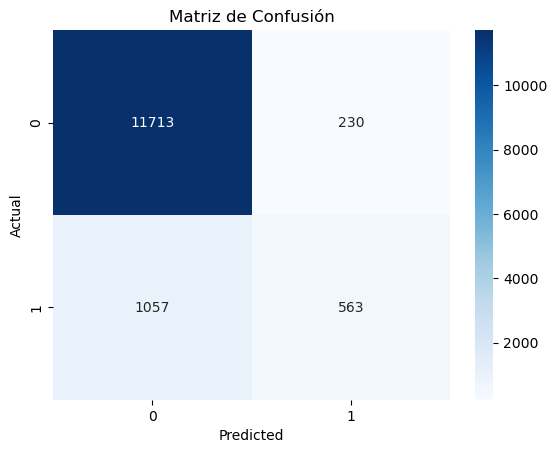

In [130]:

matriz_confusion = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
print("visualizamos el resultado en la matriz de confusion")
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy:.2f}')


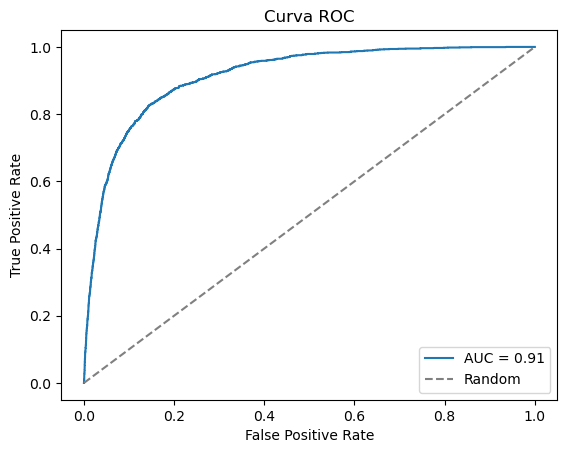

Con un AUC de 0,91 se considera al modelo como bueno


In [131]:
from sklearn.metrics import roc_curve, auc

y_prob = modelo_logistico.predict_proba(X_test)[:, 1]
fpr, tpr, umbrales = roc_curve(y_test, y_prob)

# Visualizar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()
print("Con un AUC de 0,91 se considera al modelo como bueno")

In [141]:
print("a continuacion aplicaremos la reduccion de la dimensionalidad")



a continuacion aplicaremos la reduccion de la dimensionalidad


In [200]:
print("en un primer paso reduciremos la dimension de 42 a 30 para determinar ver las variabilidades")
n_comps = 30 
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(X_train))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

en un primer paso reduciremos la dimension a la mitad para determinar ver las variabilidades


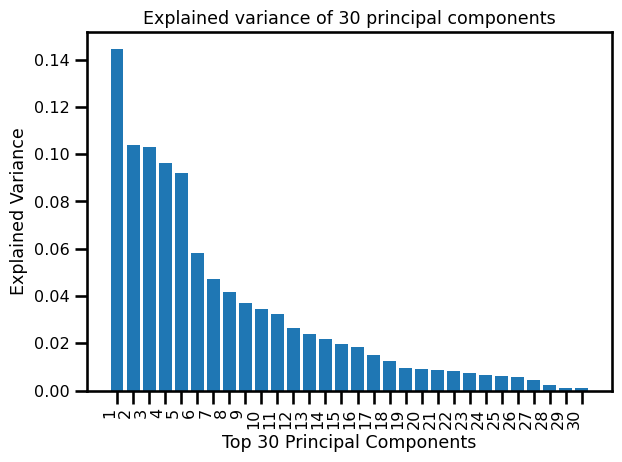

In [213]:

plt.bar(components, eigenvalues)
plt.xticks(components, rotation=90, ha='right')  # Ajusta el ángulo de las etiquetas y su alineación
plt.title('Explained variance of ' + str(n_comps) + ' principal components')
plt.xlabel('Top ' + str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.tight_layout()  
plt.show()


In [214]:
print("peso porcentual de cada valor \n",pca.explained_variance_ratio_ )

print("haremos el analisis tomando los primeros 13 valores ya que suman el 80% del total")
n_comps = 13
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(X))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

peso porcentual de cada valor 
 [0.14435638 0.10375073 0.10298927 0.09627375 0.09204682 0.05815406
 0.04705265 0.04167914 0.03688192 0.03456875 0.03256809 0.0263005
 0.02384189 0.02191253 0.01988303 0.01841415 0.01524408 0.01239676
 0.00942267 0.00904846 0.00851761 0.00842046 0.00764152 0.00671582
 0.00618996 0.005797   0.00447835 0.00242546 0.00101948 0.00096027]
haremos el analisis tomando los primeros 13 valores ya que suman el 80% del total


In [215]:
xtrain_pca, xtest_pca, ytrain_pca, ytest_pca = train_test_split(xpca, y, test_size=0.2, random_state=4)

In [216]:
# Crear y entrenar el modelo de Regresión Logística
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistico.fit(xtrain_pca, ytrain_pca)

# Hacer predicciones en el conjunto de prueba
ypred_pca = modelo_logistico.predict(xtest_pca)


visualizamos el resultado en la matriz de confusion


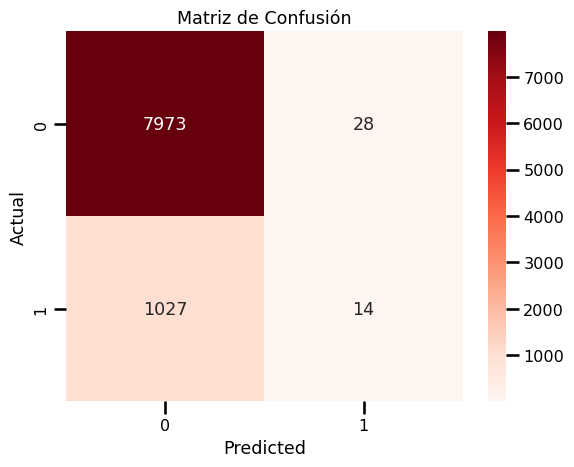

Accuracy: 0.88


In [220]:
matriz_confusion = confusion_matrix(ytest_pca, ypred_pca)

# Visualizar la matriz de confusión
print("visualizamos el resultado en la matriz de confusion")
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(ytest_pca, ypred_pca)
print(f'Accuracy: {accuracy:.2f}')


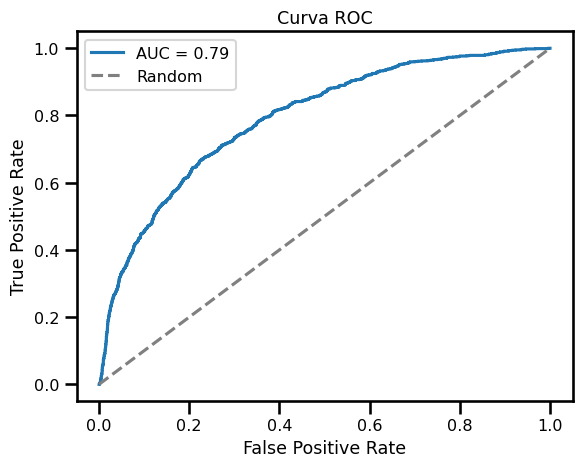

Con un AUC de 0,79 se considera al modelo como regular


In [227]:
y_prob = modelo_logistico.predict_proba(xtest_pca)[:, 1]
fpr, tpr, umbrales = roc_curve(ytest_pca, y_prob)

# Visualizar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()
print("Con un AUC de 0,79 se considera al modelo como regular")

In [228]:
#Conclusiones
print("vemos que tanto el accuracy como el AUC bajaron por lo que es mejor trabajar con las 42 variables.")
print("esto se atribuye a que el dataset original poseia 9 variables categoricas las cuales al transformarlas mediante One Hot encoding se expandieron a un total de 42 (contando las numericas)")
print("si analizamos el grafico de barras de las varianzas por componente se observa que hay un salto marcado de la primer a la segunda componente, luego de la segunda a la quinta poseen casi el mismo valor y finalmente baja de manera suave a partir de la sexta variable ")

vemos que tanto el accuracy como el AUC bajaron por lo que es mejor trabajar con las 42 variables.
esto se atribuye a que el dataset original poseia 9 variables categoricas las cuales al transformarlas mediante One Hot encoding se expandieron a un total de 42 (contando las numericas)
si analizamos el grafico de barras de las varianzas por componente se observa que hay un salto marcado de la primer a la segunda componente, luego de la segunda a la quinta poseen casi el mismo valor y finalmente baja de manera suave a partir de la sexta variable 
